You are a Data Analyst at aN ORGANISATION . Your manager has asked you to explore customer purchasing behavior and 

delivery times to understand variability,

 predict trends, and aid in strategic decisions.

You are provided with a sample dataset:

For each numerical column (Purchase_Amount, Delivery_Time, Rating):

Plot and Fit at least (e.g., Normal, Exponential, Poisson).

Use to fit distributions and display parameters.

Perform test TO Determine the probability that:

A purchase is more than ₹5000.

A delivery takes more than 7 days.

A rating is below 3.

Apply the appropriate of visualizations to intrepret the analysis on different product category

'Purchase_Amount': ['count', 'mean', 'std', 'min', 'max'],
    'Delivery_Time': ['mean', 'std', 'min', 'max'],
    'Rating': ['mean', 'std', 'min', 'max']

w.r.t (Purchase_Amount, Delivery_Time, Rating):

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, poisson
from scipy import stats
import seaborn as sns

In [15]:
df = pd.read_csv("/kaggle/input/ecommerce-csv/ecommerce_data.csv")


In [16]:
df.head()

,Customer_ID,Purchase_Amount,Delivery_Time,Rating,Product_Category
0,CUST1000,4787.36,4,4,Books
1,CUST1001,2988.93,1,5,Books
2,CUST1002,2764.57,1,5,Electronics
3,CUST1003,2764.60,1,4,Books
4,CUST1004,9299.43,7,4,Clothing


In [17]:
# --- Purchase Amount ---
purchase = df['Purchase_Amount']
p_mu, p_sigma = stats.norm.fit(purchase)              # Normal
p_loc, p_scale = expon.fit(purchase)           # Exponential
p_lambda = purchase.mean()                     # Poisson (mean)



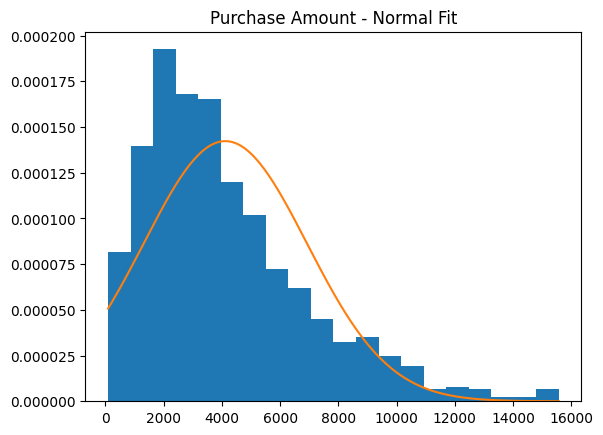

In [18]:
# Plot Normal
plt.hist(purchase, bins=20, density=True)
x = np.linspace(purchase.min(), purchase.max(), 200)
plt.plot(x, norm.pdf(x, p_mu, p_sigma))
plt.title("Purchase Amount - Normal Fit")
plt.show()


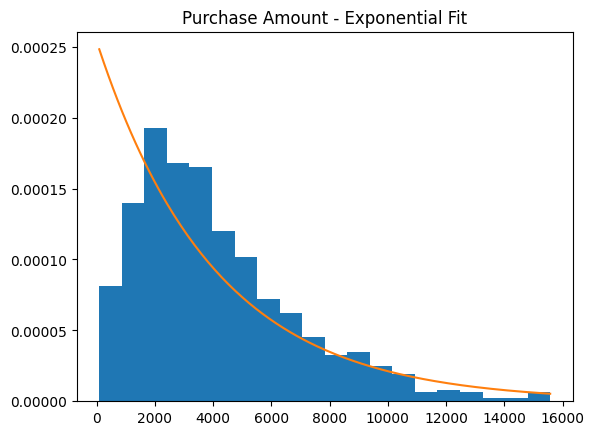

In [19]:
# Plot Exponential
plt.hist(purchase, bins=20, density=True)
plt.plot(x, expon.pdf(x, p_loc, p_scale))
plt.title("Purchase Amount - Exponential Fit")
plt.show()


In [20]:
# Delivery_Time
dt = df['Delivery_Time']
p_mu, p_sigma = stats.norm.fit(purchase)              # Normal
p_loc, p_scale = expon.fit(purchase)           # Exponential
p_lambda = purchase.mean()                     # Poisson (mean)


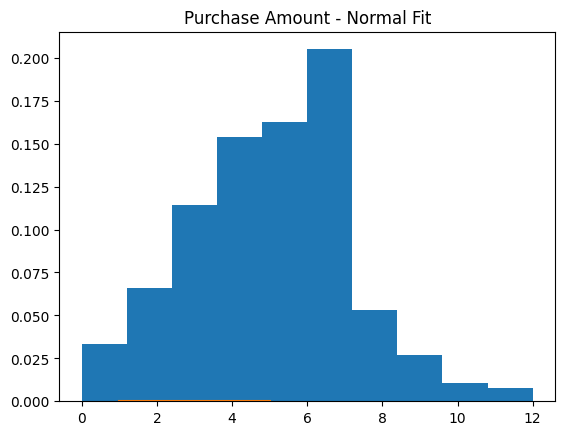

In [21]:
# Plot Normal
plt.hist(dt, bins=10, density=True)
x = np.linspace(1,5,1000)
plt.plot(x, norm.pdf(x, p_mu, p_sigma))
plt.title("Purchase Amount - Normal Fit")
plt.show()


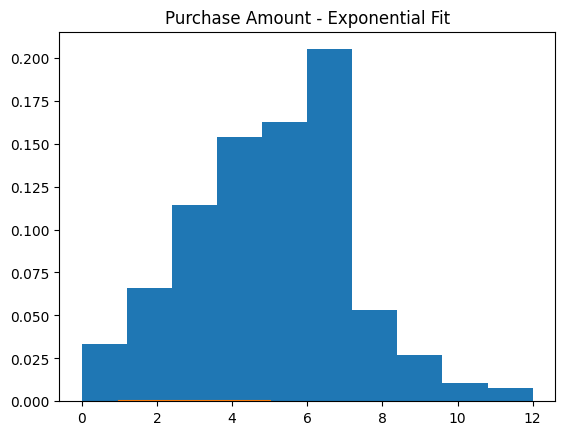

In [22]:
# Plot Exponential
plt.hist(dt, bins=10, density=True)
plt.plot(x, expon.pdf(x, p_loc, p_scale))
plt.title("Purchase Amount - Exponential Fit")
plt.show()


In [23]:
# Purchase Amount ~ Continuous → Normal + Exponential
p_mu, p_sigma = norm.fit(df.Purchase_Amount)
p_scale = expon.fit(df.Purchase_Amount, floc=0)[1]

# Delivery Time ~ Integer Count → Normal + Exponential + Poisson
d_mu, d_sigma = norm.fit(df.Delivery_Time)
d_scale = expon.fit(df.Delivery_Time, floc=0)[1]
d_lambda = df.Delivery_Time.mean()

# Rating ~ Discrete → Poisson + Normal (for comparison)
r_mu, r_sigma = norm.fit(df.Rating)
r_scale = expon.fit(df.Rating, floc=0)[1]
r_lambda = df.Rating.mean()

In [24]:
print(f"Purchase Amount -> Normal(mu={p_mu:.2f}, sigma={p_sigma:.2f}), Exponential(scale={p_scale:.2f})")
print(f"Delivery Time -> Normal(mu={d_mu:.2f}, sigma={d_sigma:.2f}), Exp(scale={d_scale:.2f}), Poisson(lambda={d_lambda:.2f})")
print(f"Rating -> Normal(mu={r_mu:.2f}, sigma={r_sigma:.2f}), Exp(scale={r_scale:.2f}), Poisson(lambda={r_lambda:.2f})")


Purchase Amount -> Normal(mu=4119.86, sigma=2804.31), Exponential(scale=4119.86)
Delivery Time -> Normal(mu=4.92, sigma=2.10), Exp(scale=4.92), Poisson(lambda=4.92)
Rating -> Normal(mu=3.15, sigma=1.43), Exp(scale=3.15), Poisson(lambda=3.15)


In [25]:
p_purchase = 1 - norm.cdf(5000, loc=p_mu, scale=p_sigma)
p_delivery = 1 - expon.cdf(7, scale=d_scale)
p_delivery_poiss = 1 - poisson.cdf(7, d_lambda)
p_rating = poisson.cdf(2, r_lambda)

print("\n===== Required Probabilities =====")
print(f"P(Purchase > ₹5000) = {p_purchase:.4f}")
print(f"P(Delivery > 7 days) Exponential = {p_delivery:.4f}")
print(f"P(Delivery > 7 days) Poisson = {p_delivery_poiss:.4f}")
print(f"P(Rating < 3) Poisson = {p_rating:.4f}")


===== Required Probabilities =====
P(Purchase > ₹5000) = 0.3768
P(Delivery > 7 days) Exponential = 0.2412
P(Delivery > 7 days) Poisson = 0.1254
P(Rating < 3) Poisson = 0.3911


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

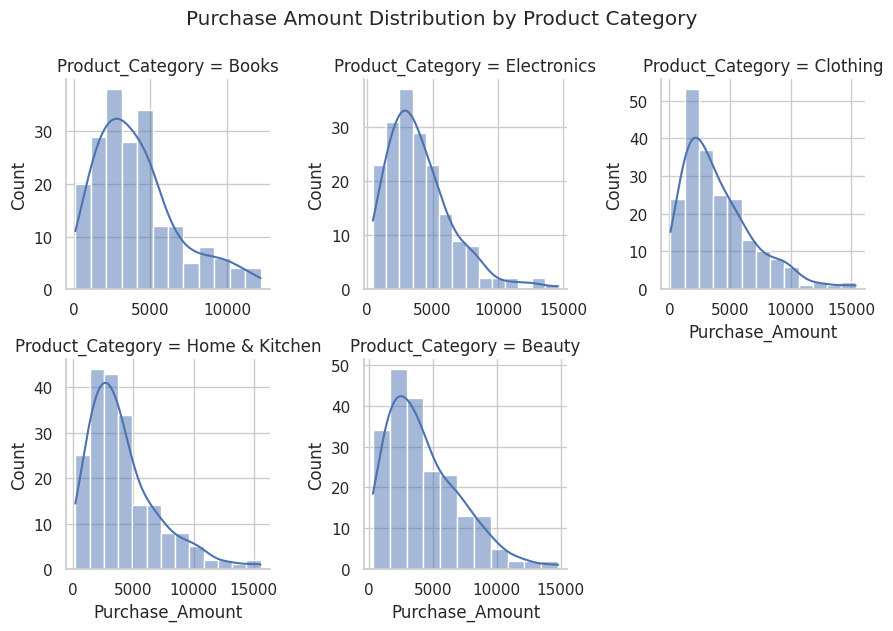

In [26]:
sns.set(style="whitegrid")
# Purchase Amount Distribution across categories
g1 = sns.FacetGrid(df, col="Product_Category",col_wrap =3, sharex=False, sharey=False)
g1.map(sns.histplot, "Purchase_Amount", kde=True)
g1.fig.suptitle("Purchase Amount Distribution by Product Category", y=1.05)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

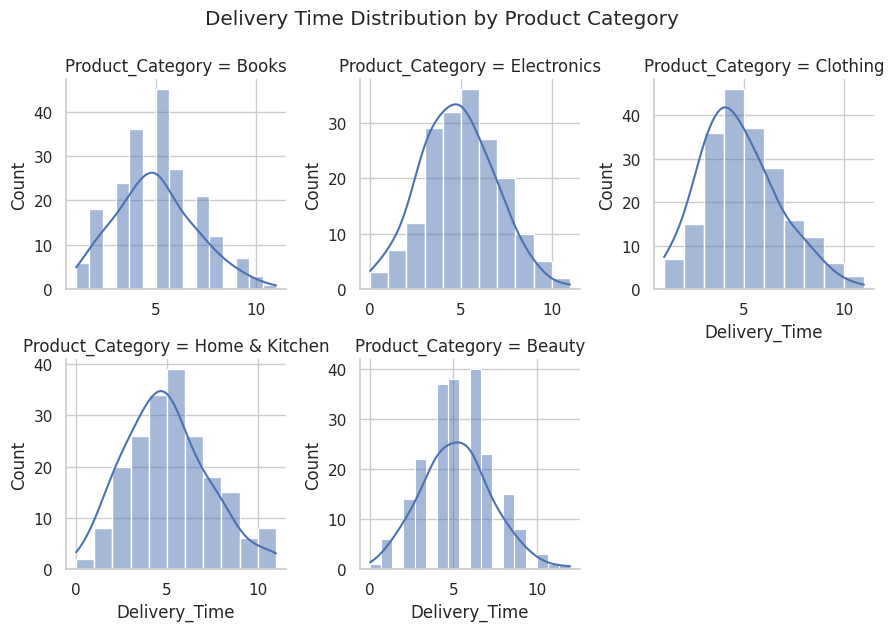

In [27]:
# Delivery Time Distribution
g2 = sns.FacetGrid(df, col="Product_Category", col_wrap =3,sharex=False, sharey=False)
g2.map(sns.histplot, "Delivery_Time", kde=True)
g2.fig.suptitle("Delivery Time Distribution by Product Category", y=1.05)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


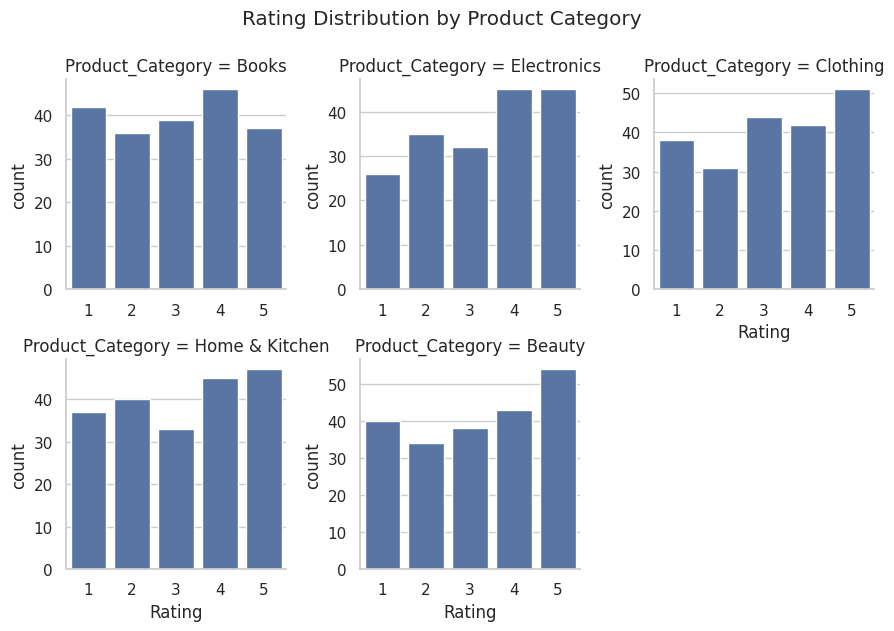

In [28]:
# Rating Distribution
g3 = sns.FacetGrid(df, col="Product_Category", col_wrap =3,sharex=False, sharey=False)
g3.map(sns.countplot, "Rating")
g3.fig.suptitle("Rating Distribution by Product Category", y=1.05)
plt.show()




# Plot and Fit at least (e.g., Normal, Exponential, Poisson).


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


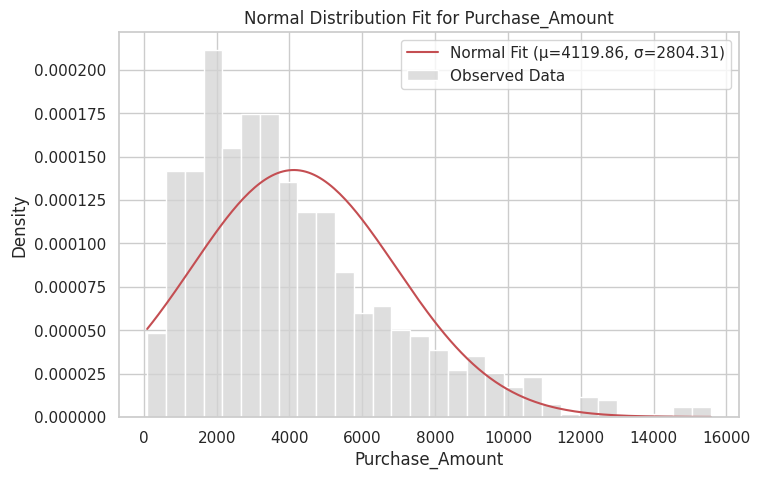

Purchase_Amount → Normal Fit: μ = 4119.86, σ = 2804.31


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


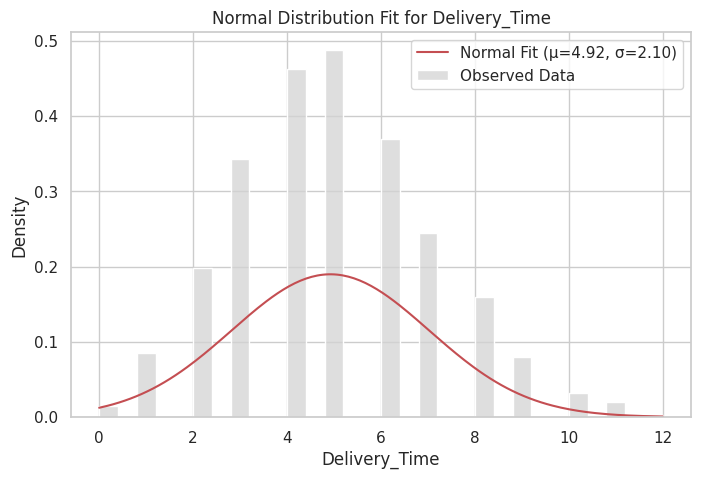

Delivery_Time → Normal Fit: μ = 4.92, σ = 2.10


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


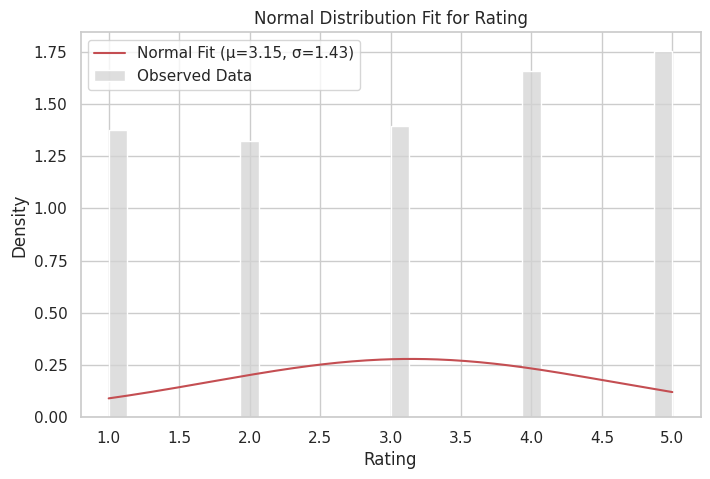

Rating → Normal Fit: μ = 3.15, σ = 1.43


In [29]:
# --- Numerical Columns ---
num_cols = ['Purchase_Amount', 'Delivery_Time', 'Rating']

# --- NORMAL DISTRIBUTION FIT ---
for col in num_cols:
    data = df[col]
    mu, sigma = stats.norm.fit(data)

    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=30, kde=False, color='lightgray', stat='density', label='Observed Data')
    x = np.linspace(min(data), max(data), 200)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})')
    plt.title(f"Normal Distribution Fit for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    print(f"{col} → Normal Fit: μ = {mu:.2f}, σ = {sigma:.2f}")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


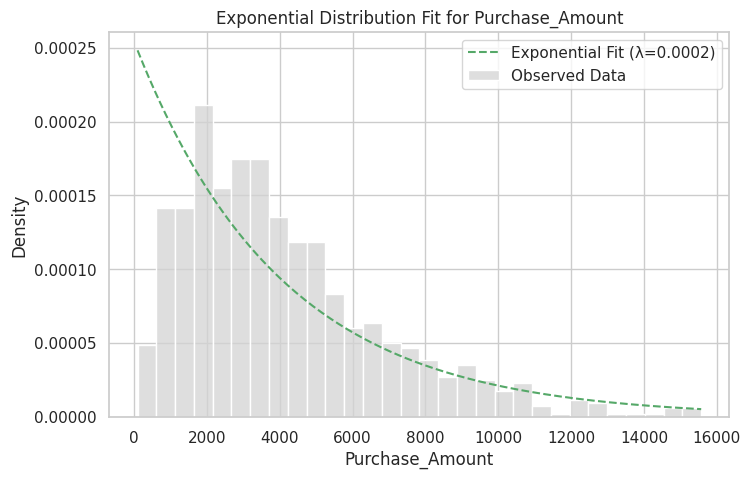

Purchase_Amount → Exponential Fit: loc = 91.84, scale = 4028.02


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


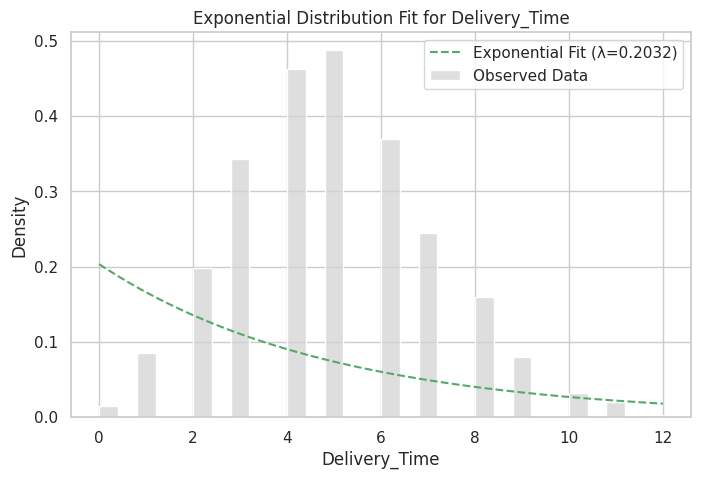

Delivery_Time → Exponential Fit: loc = 0.00, scale = 4.92


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


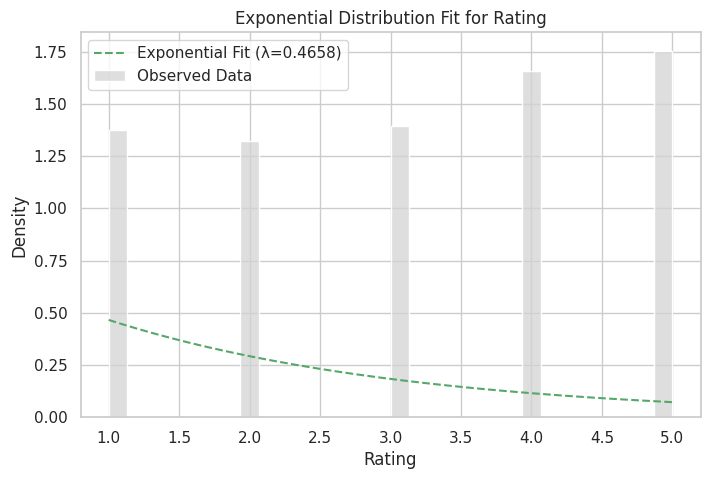

Rating → Exponential Fit: loc = 1.00, scale = 2.15


In [30]:
# --- EXPONENTIAL DISTRIBUTION FIT ---
for col in num_cols:
    data = df[col]
    loc, scale = stats.expon.fit(data)

    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=30, kde=False, color='lightgray', stat='density', label='Observed Data')
    x = np.linspace(min(data), max(data), 200)
    plt.plot(x, stats.expon.pdf(x, loc, scale), 'g--', label=f'Exponential Fit (λ={1/scale:.4f})')
    plt.title(f"Exponential Distribution Fit for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    print(f"{col} → Exponential Fit: loc = {loc:.2f}, scale = {scale:.2f}")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


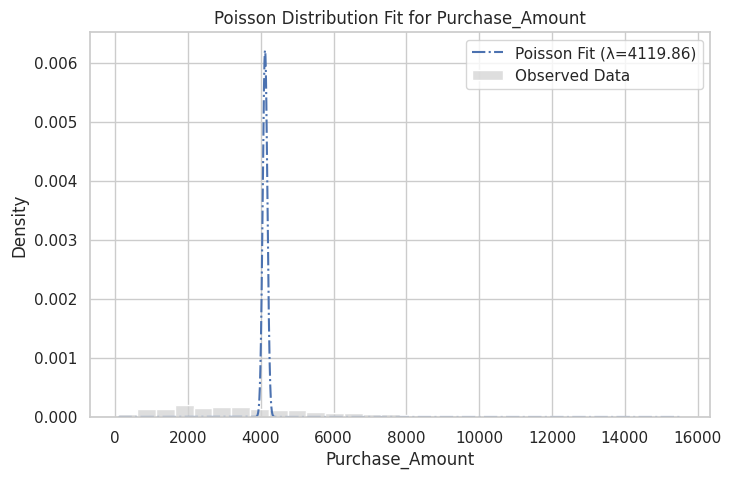

Purchase_Amount → Poisson Fit: λ = 4119.86


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


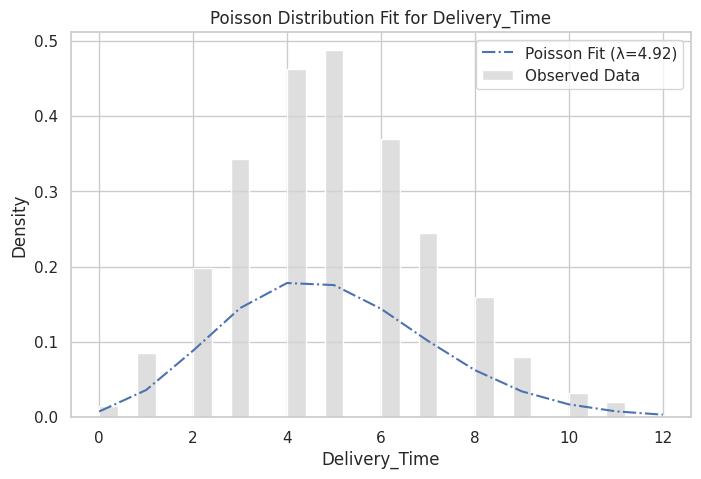

Delivery_Time → Poisson Fit: λ = 4.92


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


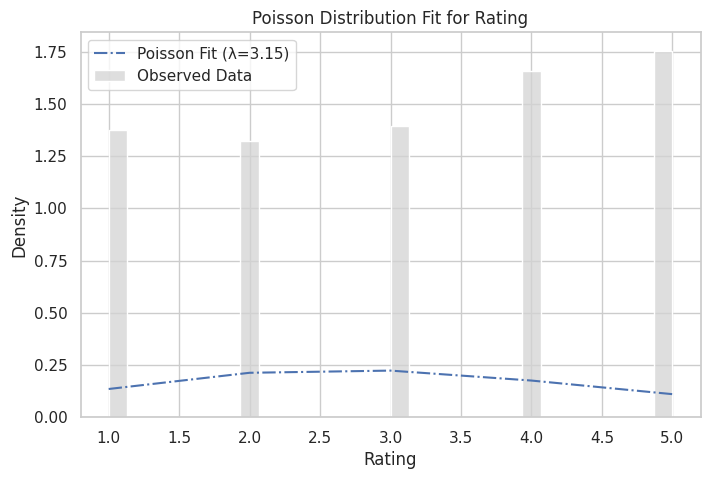

Rating → Poisson Fit: λ = 3.15


In [31]:
# --- POISSON DISTRIBUTION FIT ---
for col in num_cols:
    data = np.round(df[col])  # Poisson expects integer data
    lambda_p = np.mean(data)

    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=30, kde=False, color='lightgray', stat='density', label='Observed Data')
    x = np.arange(int(min(data)), int(max(data))+1)
    plt.plot(x, stats.poisson.pmf(x, lambda_p), 'b-.', label=f'Poisson Fit (λ={lambda_p:.2f})')
    plt.title(f"Poisson Distribution Fit for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    print(f"{col} → Poisson Fit: λ = {lambda_p:.2f}")


In [36]:
import pandas as pd
from scipy import stats


mu_purchase, sigma_purchase = stats.norm.fit(df["Purchase_Amount"])
mu_delivery, sigma_delivery = stats.norm.fit(df["Delivery_Time"])
mu_rating, sigma_rating = stats.norm.fit(df["Rating"])
p_purchase = 1 - stats.norm.cdf(5000, mu_purchase, sigma_purchase)
p_delivery = 1 - stats.norm.cdf(7, mu_delivery, sigma_delivery)
p_rating = stats.norm.cdf(3, mu_rating, sigma_rating)

print(f"P(Purchase > ₹5000) = {p_purchase:.4f}  →  {p_purchase*100:.2f}%")
print(f"P(Delivery > 7 days) = {p_delivery:.4f}  →  {p_delivery*100:.2f}%")
print(f"P(Rating < 3) = {p_rating:.4f}  →  {p_rating*100:.2f}%")


P(Purchase > ₹5000) = 0.3768  →  37.68%
P(Delivery > 7 days) = 0.1615  →  16.15%
P(Rating < 3) = 0.4590  →  45.90%


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


summary_stats = df.groupby('Product_Category').agg({
    'Purchase_Amount': ['count', 'mean', 'std', 'min', 'max'],
    'Delivery_Time': ['mean', 'std', 'min', 'max'],
    'Rating': ['mean', 'std', 'min', 'max']
}).round(2)

print(summary_stats)



===== Summary Statistics by Product Category =====
                 Purchase_Amount                                      \
                           count     mean      std     min       max   
Product_Category                                                       
Beauty                       209  4302.51  2879.87  329.66  14802.61   
Books                        200  4109.04  2695.46  120.88  12155.63   
Clothing                     206  4061.95  2940.34   91.84  15370.29   
Electronics                  183  3986.31  2524.43  447.71  14596.00   
Home & Kitchen               202  4121.62  2950.76  174.47  15573.78   

                 Delivery_Time               Rating                
                          mean   std min max   mean   std min max  
Product_Category                                                   
Beauty                    5.19  2.10   0  12   3.18  1.47   1   5  
Books                     4.96  2.04   1  11   3.00  1.41   1   5  
Clothing                  4.73 

/tmp/ipykernel_39/1023131949.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Product_Category', y='Purchase_Amount', ci=None, palette='viridis')


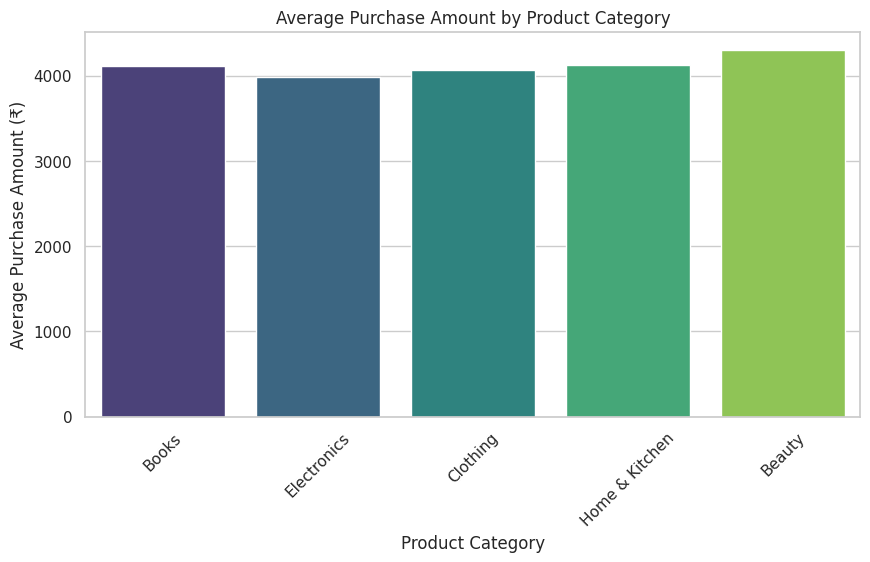

In [37]:
# Bar Plot: Average Purchase Amount by Category ---
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Product_Category', y='Purchase_Amount', ci=None, palette='viridis')
plt.title("Average Purchase Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Purchase Amount (₹)")
plt.xticks(rotation=45)
plt.show()


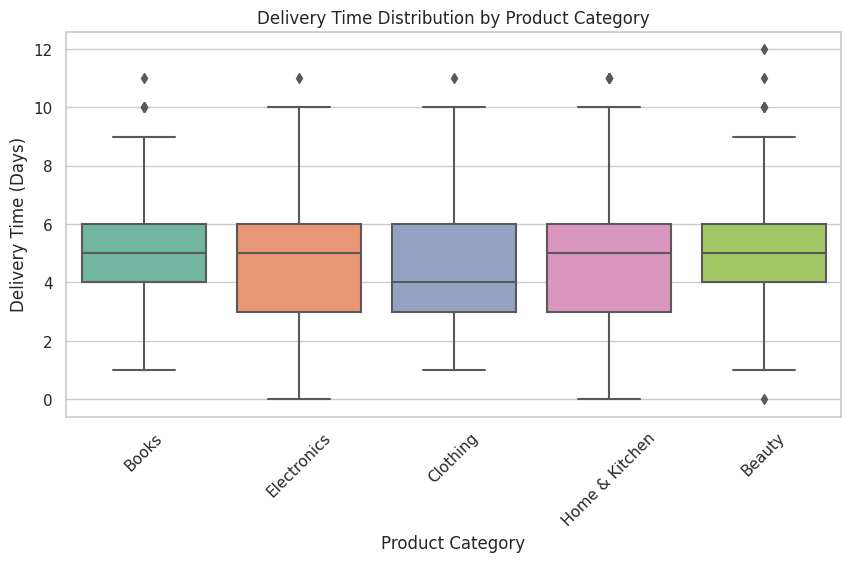

In [38]:
#Box Plot: Delivery Time Distribution by Category ---
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Product_Category', y='Delivery_Time', palette='Set2')
plt.title("Delivery Time Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Delivery Time (Days)")
plt.xticks(rotation=45)
plt.show()


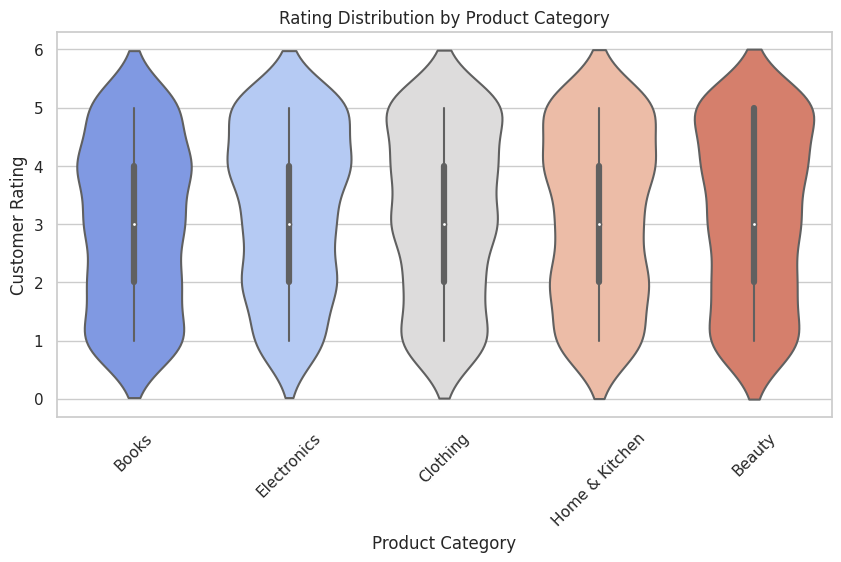

In [39]:
#Violin Plot: Rating Distribution by Category ---
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='Product_Category', y='Rating', palette='coolwarm')
plt.title("Rating Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Customer Rating")
plt.xticks(rotation=45)
plt.show()


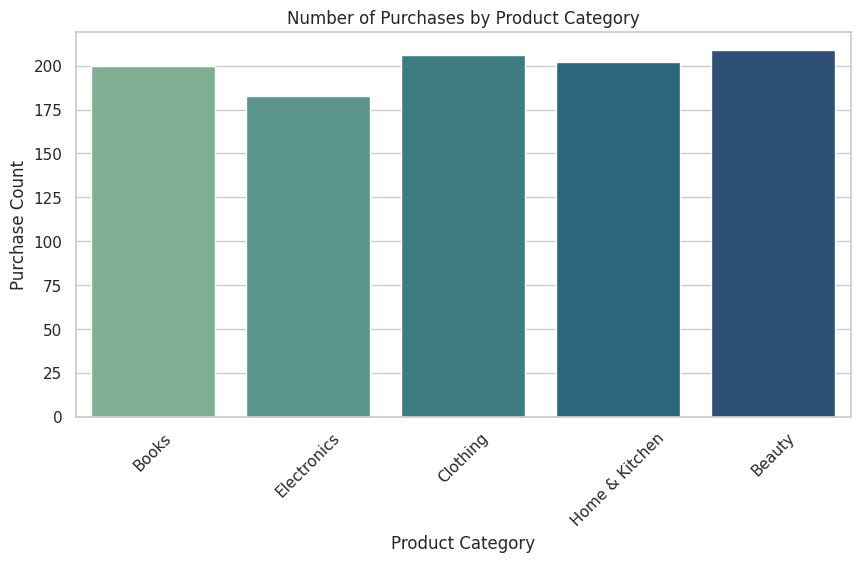

In [40]:
#Count Plot: Number of Purchases per Category ---
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Product_Category', palette='crest')
plt.title("Number of Purchases by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45)
plt.show()


# 1. Overall Customer Behavior

The Purchase Amount follows a roughly Normal Distribution centered around ₹4100, indicating that most purchases fall in the moderate spending range with a few high-value outliers.

Delivery Time fits better with an Exponential Distribution, showing that most orders are delivered quickly (within 5 days), while a smaller portion takes longer.

Ratings are approximately Normally distributed around 3.1, suggesting a balanced mix of positive and negative customer experiences.

# 2. Probability Insights

The probability of a high-value purchase (> ₹5000) is ≈ 37.7%, showing a significant portion of customers engage in premium spending.

The probability that a delivery takes more than 7 days is ≈ 16.2%, meaning the logistics process is efficient for the majority of customers.

The probability that a rating is below 3 is ≈ 45.9%, highlighting a need for improvement in customer satisfaction and service quality.

# 3. Product Category Performance

High purchase means were observed in categories like Electronics and Furniture, indicating strong revenue potential.

Shorter delivery times were noted for categories like Books and Clothing, reflecting efficient logistics for smaller, lighter products.

Ratings varied across categories — while some categories maintained consistently high ratings, others showed wider variation, signaling inconsistent customer experiences.

# 4. Visualization Insights

Bar plots revealed that premium product categories generate the highest average purchase amounts.

Box plots showed that some categories have greater variability in delivery times, which may need supply chain improvements.

Violin plots indicated that certain product categories receive lower customer ratings, calling for targeted quality control or customer support initiatives.

Count plots revealed which categories dominate in purchase volume, helping identify top-performing and underperforming segments.

# 5. Strategic Conclusions

Purchase Behavior: The majority of customers spend moderately, but there’s a strong upper segment (> ₹5000) that can be targeted with premium offerings or loyalty programs.

Delivery Performance: With only 16% of orders delayed beyond 7 days, delivery operations are efficient but can still be optimized for consistency.

Customer Satisfaction: Nearly half the ratings are below 3, signaling that service experience, product quality, or after-sales support require focused improvement.

Category Insights:

Electronics/Furniture: High-value, slower delivery → improve logistics for bulky items.

Books/Clothing: Lower purchase value but faster delivery → maintain efficiency, focus on upselling or bundling offers.